In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
root_dir = "drive/My Drive/draw_ai/"
scripts_dir = root_dir + "scripts"
%cd {scripts_dir}

# Before starting
1. Use a colab with GPU runtime
2. Mount root directory in Google Drive

# Sketch generation model
This notebook trains a sketch style generation model that uses a variational autoencoder (VAE) to infer curve styles and generate drawing sequences.

# Script files
- model_components.py: LSTM encoder and decoder
- sketch_generation.py: VAE model combining the encoder and decoder
- data_utils.py: Data processing scripts and PyTorch Dataset loading
- helpers.py: Model training helper scripts and hyper parameter class


In [ ]:
from data_utils import *
from helpers import *
from sketch_generation import *
from model_components import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Model Description
SketchTransfer_nolabel model does not require style label input in encoder or decoder. With curves of diverse styles as input, the styles can be inferred in the latent space and we can further control the output style with latent space parameters solely.

Model input: Drawing sequences of displacements dx dy of fixed length

Model output: dx,dy sequence of same lengths as input


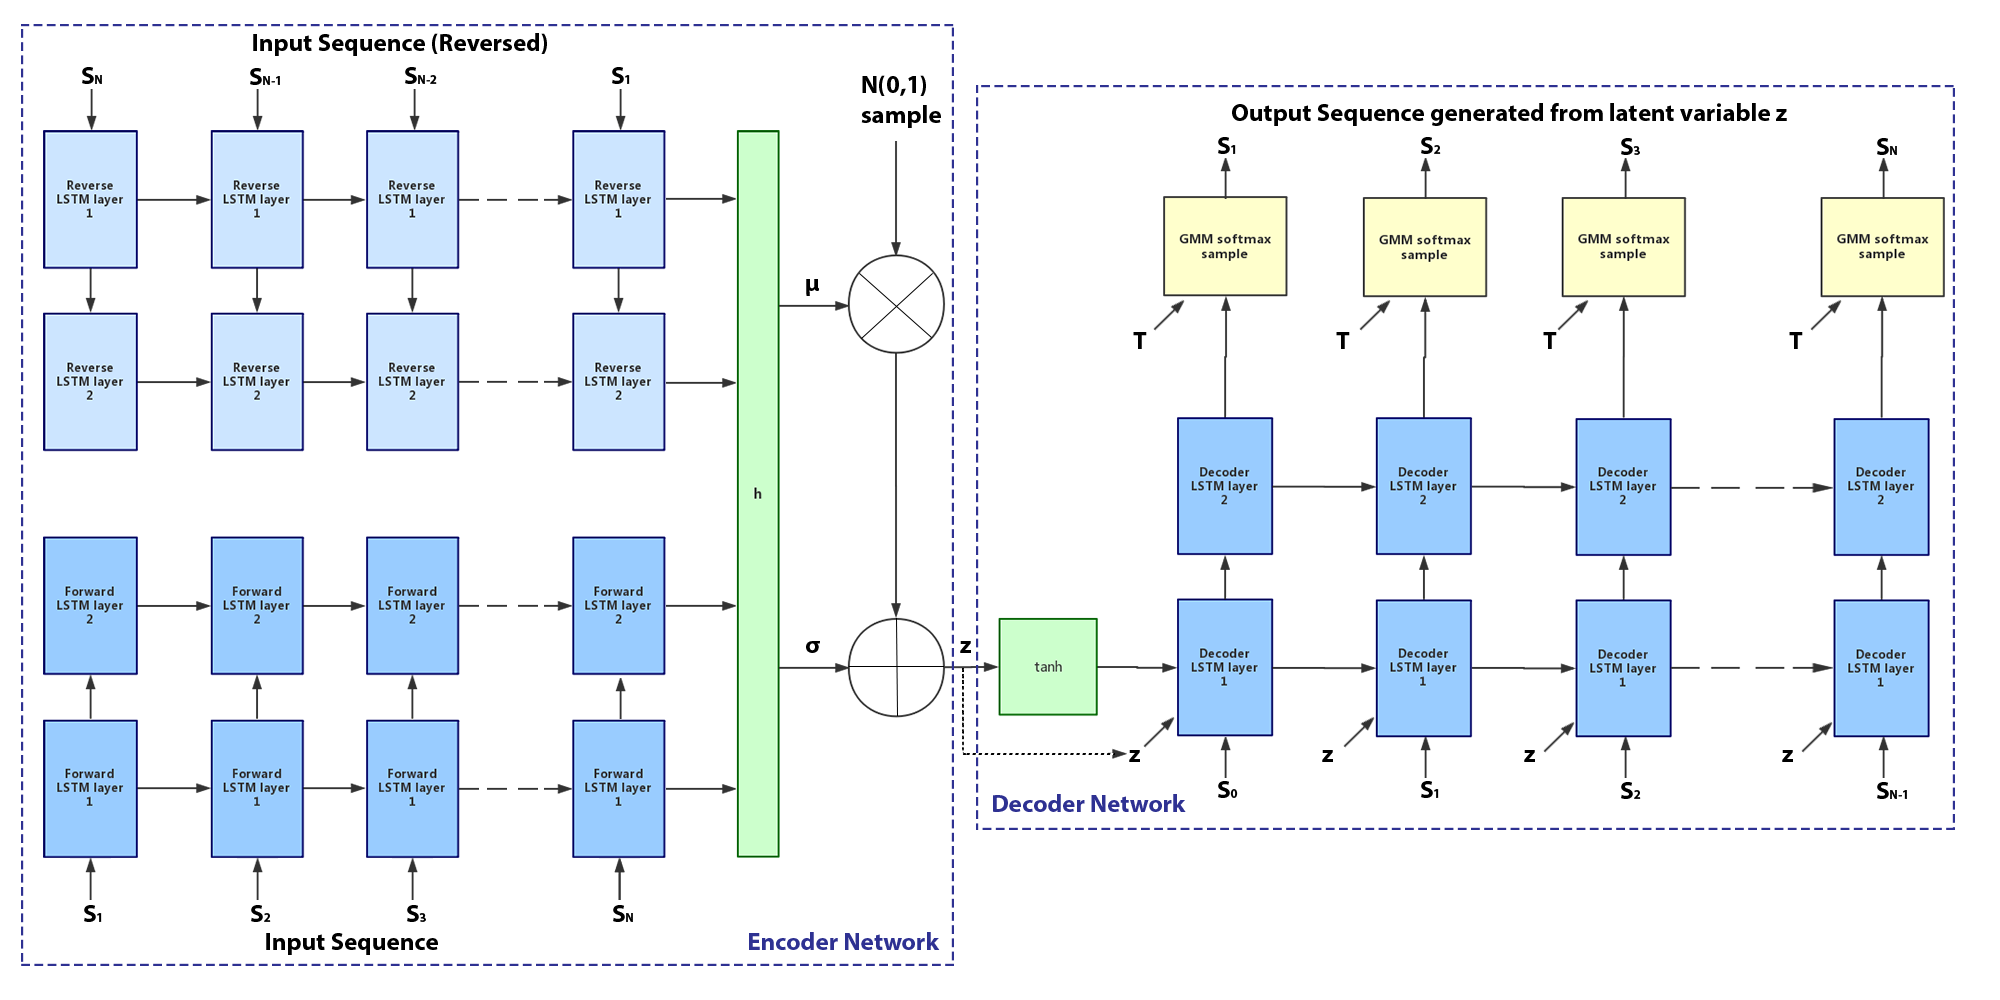

In [ ]:
hp = HParams()
hp.enc_hidden_size = 256  # 256
hp.dec_hidden_size = 256  # 512
hp.Nmax = 80
hp.save_every = 100
hp.wKL = 0.01
hp.dropout = 0.2
hp.KL_start = 0.01
hp.KL_delta = 0.003
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.998
hp.enc_layers = 2
hp.dec_layers = 2
hp.Nz = 2   # latent dimension
hp.Nz_dec = hp.Nz # 1 encoder, 1 decoder
hp.M = 3 # gaussian mixture
dataset = FromNpy("10curves.npy")
#dataset = MixData("data/line5.csv", ["data/deltas_transformed (2).csv", "data/deltas_transformed (3).csv"], \
#                  n_styles=7, seg_len=100, window=100, smooth_iterations=5, cutoff=(15,40))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True, num_workers=0)
model = SketchTransfer_nolabel(hp)

In [ ]:
for i in range(500):
    model.train(dataloader, i)